For this exercise we will use the code we wrote for the gradient descent from scratch for the simple linear regression :

f
(
x
)
=
β
1
×
x
+
β
0
f(x)=β
1
​
 ×x+β
0
​


Import the following libraries:
Numpy
random

In [79]:
import numpy as np
import random

In [80]:
class Model():
  def __init__(self):
    self.beta_1 = np.random.randn(1)
    self.beta_0 = np.random.randn(1)

  def __call__(self, x):
    return self.beta_1 * x + self.beta_0

In [81]:
from sklearn.datasets import load_diabetes

In [82]:
diabetes = load_diabetes()
print(diabetes.DESCR)
diabetes_data = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

We have too much data in this dataset diabetes_data, take only the third column of the dataset and store it in a diabetes_X variable.

In [83]:
diabetes_X = diabetes_data[:,2]
diabetes_X[:5]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469])

In [84]:
def mse(y_pred, y_true):
  return np.mean((y_pred -y_true)**2)

In [85]:
def derivative_mse_beta_1(x, y_pred, y_true):
  derive_model_beta_1 = 2/len(y_pred)*np.sum((x @ (y_pred - y_true)))
  return derive_model_beta_1

In [86]:
def derivative_mse_beta_0(y_pred, y_true):
  derive_model_beta_0 = 2/len(y_pred)*(np.sum(y_pred - y_true))
  return derive_model_beta_0

In [87]:
learning_rate = 0.1
epochs = 1000

We have previously coded the gradient descent algorithm as follows, we are just adding two lines of code to keep in memory the variations of the loss function at each epoch (since we are using gradient descent one epoch equals one adjustment of the coefficients) :

In [90]:
%%time

from tqdm import tqdm  # Pour la barre de progression

# Initialisation des variables
loss_history = []
model = Model()

print("Début de l'entraînement...")
for epoch in tqdm(range(epochs), desc="Entraînement en cours"):
    # Calcul des prédictions (évite des recalculs inutiles)
    predictions = model(diabetes_X)

    # Calcul de la fonction de perte
    current_loss = mse(predictions, y)
    loss_history.append(current_loss)

    # Mise à jour des variables du modèle
    gradient_beta_1 = derivative_mse_beta_1(diabetes_X, predictions, y)
    gradient_beta_0 = derivative_mse_beta_0(predictions, y)
    model.beta_1 -= learning_rate * gradient_beta_1
    model.beta_0 -= learning_rate * gradient_beta_0

    # Affichage des variables tous les 100 epochs ou à la dernière itération
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"-------------------- Epoch {epoch} --------------------")
        print(f"Current Loss: {current_loss:.4f}")
        print(f"beta_1 = {model.beta_1.item():.4f}")
        print(f"beta_0 = {model.beta_0.item():.4f}")

print("Entraînement terminé.")

Début de l'entraînement...


Entraînement en cours: 100%|██████████| 1000/1000 [00:00<00:00, 16693.61it/s]

-------------------- Epoch 0 --------------------
Current Loss: 28811.4177
beta_1 = -0.8504
beta_0 = 31.1349
-------------------- Epoch 100 --------------------
Current Loss: 5758.4167
beta_1 = 41.2000
beta_0 = 152.1335
-------------------- Epoch 200 --------------------
Current Loss: 5596.7591
beta_1 = 81.3896
beta_0 = 152.1335
-------------------- Epoch 300 --------------------
Current Loss: 5449.0918
beta_1 = 119.8007
beta_0 = 152.1335
-------------------- Epoch 400 --------------------
Current Loss: 5314.2039
beta_1 = 156.5122
beta_0 = 152.1335
-------------------- Epoch 500 --------------------
Current Loss: 5190.9895
beta_1 = 191.5992
beta_0 = 152.1335
-------------------- Epoch 600 --------------------
Current Loss: 5078.4384
beta_1 = 225.1336
beta_0 = 152.1335
-------------------- Epoch 700 --------------------
Current Loss: 4975.6277
beta_1 = 257.1841
beta_0 = 152.1335
-------------------- Epoch 800 --------------------
Current Loss: 4881.7145
beta_1 = 287.8164
beta_0 = 152.13

In [93]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = diabetes_X,
    y = y,
    mode = "markers",
    name = "target")
)

fig.add_trace(go.Scatter(
    x = diabetes_X,
    y = model(diabetes_X),
    mode = "lines",
    name = "predictions")
)

fig.update_layout(
    title = "Target vs predictions",
    xaxis_title = "BMI",
    yaxis_title = "Diabetes Metrics"
)

fig.show()

# Stochastic gradient descent

Let's now implement stochastic gradient descent! Reproduce the training loop for training the model but you will define :

sample_size : the number of observations randomly selected at each step
steps_per_epochs : the number of steps before the model has trained on as many observations as the total number of observations in the dataset.

stochastic_loss_history : a list that will contain the loss after each epoch is finished

stochastic_loss_by_step_history : a list that will contain the loss after each step

⚠️Don't forget to add %%time at the beginning of the cell to measure how long the stochastic gradient descent took to run over 1000 epochs⚠️

In [95]:
%%time

# Définition des paramètres
sample_size = 100
steps_per_epochs = len(diabetes_X) // sample_size  # Nombre d'étapes par epoch
stochastic_loss_history = []
stochastic_loss_by_step_history = []

# Initialisation du modèle
model = Model()

print("Début de l'entraînement...")
for epoch in tqdm(range(epochs), desc="Entraînement en cours"):
    for step in range(steps_per_epochs):
        # Sélectionner un échantillon aléatoire
        indices = np.random.choice(len(diabetes_X), size=sample_size, replace=False)
        X_sample = diabetes_X[indices]
        y_sample = y[indices]

        # Calcul des prédictions pour l'échantillon
        predictions = model(X_sample)

        # Calcul de la fonction de perte pour ce step
        current_loss = mse(predictions, y_sample)
        stochastic_loss_by_step_history.append(current_loss)

        # Mise à jour des variables du modèle pour ce step
        gradient_beta_1 = derivative_mse_beta_1(X_sample, predictions, y_sample)
        gradient_beta_0 = derivative_mse_beta_0(predictions, y_sample)
        model.beta_1 -= learning_rate * gradient_beta_1
        model.beta_0 -= learning_rate * gradient_beta_0

    # Calcul de la perte pour l'ensemble des données après chaque epoch
    predictions_full = model(diabetes_X)
    epoch_loss = mse(predictions_full, y)
    stochastic_loss_history.append(epoch_loss)

    # Affichage tous les 100 epochs ou à la dernière itération
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"-------------------- Epoch {epoch} --------------------")
        print(f"Current Loss: {epoch_loss:.4f}")
        print(f"beta_1 = {model.beta_1.item():.4f}")
        print(f"beta_0 = {model.beta_0.item():.4f}")

print("Entraînement terminé.")

Début de l'entraînement...


Entraînement en cours:  20%|██        | 205/1000 [00:00<00:00, 2042.18it/s]

-------------------- Epoch 0 --------------------
Current Loss: 10120.4668
beta_1 = 2.7555
beta_0 = 87.3075
-------------------- Epoch 100 --------------------
Current Loss: 5300.3107
beta_1 = 160.2537
beta_0 = 151.2462
-------------------- Epoch 200 --------------------
Current Loss: 4873.5968
beta_1 = 290.6489
beta_0 = 153.2475
-------------------- Epoch 300 --------------------
Current Loss: 4577.5840
beta_1 = 398.8153
beta_0 = 153.2264
-------------------- Epoch 400 --------------------
Current Loss: 4366.9159
beta_1 = 490.6669
beta_0 = 152.6686


Entraînement en cours: 100%|██████████| 1000/1000 [00:00<00:00, 2145.26it/s]

-------------------- Epoch 500 --------------------
Current Loss: 4223.6562
beta_1 = 566.4517
beta_0 = 153.2965
-------------------- Epoch 600 --------------------
Current Loss: 4128.6323
beta_1 = 630.0677
beta_0 = 149.4102
-------------------- Epoch 700 --------------------
Current Loss: 4050.8797
beta_1 = 683.8965
beta_0 = 153.0803
-------------------- Epoch 800 --------------------
Current Loss: 4002.3122
beta_1 = 727.9864
beta_0 = 153.0855
-------------------- Epoch 900 --------------------
Current Loss: 3970.5149
beta_1 = 764.7855
beta_0 = 150.4250
-------------------- Epoch 999 --------------------
Current Loss: 3950.1558
beta_1 = 793.8322
beta_0 = 154.3516
Entraînement terminé.
CPU times: user 456 ms, sys: 33.1 ms, total: 489 ms
Wall time: 474 ms


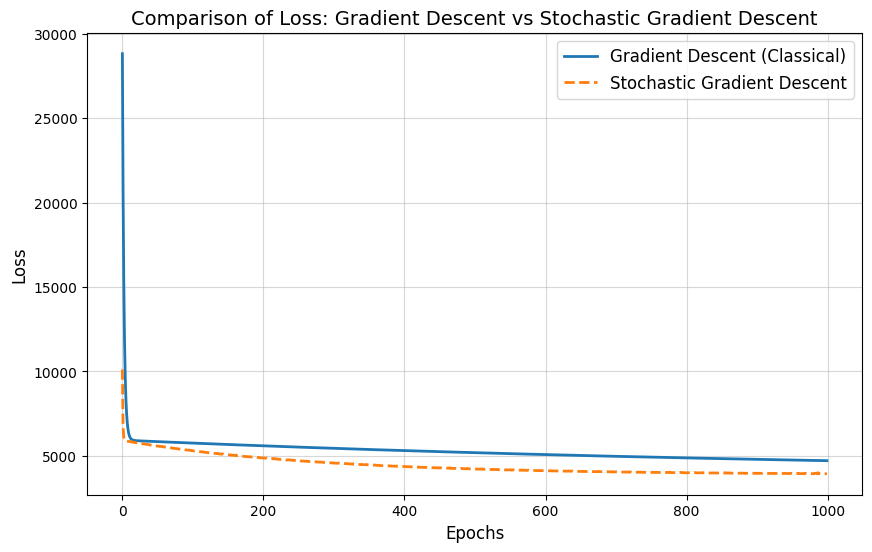

In [96]:
import matplotlib.pyplot as plt

# Visualisation des pertes
plt.figure(figsize=(10, 6))

# Tracé des pertes pour le gradient classique
plt.plot(loss_history, label="Gradient Descent (Classical)", linewidth=2)

# Tracé des pertes pour le gradient stochastique
plt.plot(stochastic_loss_history, label="Stochastic Gradient Descent", linewidth=2, linestyle="dashed")

# Configuration du graphique
plt.title("Comparison of Loss: Gradient Descent vs Stochastic Gradient Descent", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Affichage
plt.show()

In [97]:
# Création des traces pour les deux courbes
fig = go.Figure()

# Trace pour Gradient Descent classique
fig.add_trace(go.Scatter(
    y=loss_history,
    mode='lines',
    name='Gradient Descent (Classical)',
    line=dict(width=2)
))

# Trace pour Stochastic Gradient Descent
fig.add_trace(go.Scatter(
    y=stochastic_loss_history,
    mode='lines',
    name='Stochastic Gradient Descent',
    line=dict(width=2, dash='dash')
))

# Mise en forme du graphique
fig.update_layout(
    title='Comparison of Loss: Gradient Descent vs Stochastic Gradient Descent',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    legend=dict(font=dict(size=12)),
    template='plotly_white'
)

# Affichage
fig.show()

# Batch gradient descent

Now let's implement batch gradient descent, for this you will need :

batch_size : the number of observations in each batch

steps_per_epochs : the number of steps before the model has trained on as many observations as the total number of observations in the dataset (meaning number of batches).

batch_loss_history : a list that will contain the loss after each epoch is finished

batch_loss_by_step_history : a list that will contain the loss after each step

⚠️Don't forget to add %%time at the beginning of the cell to measure how long the stochastic gradient descent took to run over 1000 epochs⚠️



In [99]:
%%time

# Définition des paramètres
batch_size = 100
steps_per_epochs = len(diabetes_X) // batch_size
batch_loss_history = []
batch_loss_by_step_history = []

# Initialisation du modèle
model = Model()

print("Début de l'entraînement...")
for epoch in tqdm(range(epochs), desc="Entraînement en cours"):
    for step in range(steps_per_epochs):
        # Création d'un batch
        start_idx = step * batch_size
        end_idx = start_idx + batch_size
        X_batch = diabetes_X[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        # Calcul des prédictions pour le batch
        predictions = model(X_batch)

        # Calcul de la fonction de perte pour ce step
        current_loss = mse(predictions, y_batch)
        batch_loss_by_step_history.append(current_loss)

        # Mise à jour des variables du modèle pour ce batch
        gradient_beta_1 = derivative_mse_beta_1(X_batch, predictions, y_batch)
        gradient_beta_0 = derivative_mse_beta_0(predictions, y_batch)
        model.beta_1 -= learning_rate * gradient_beta_1
        model.beta_0 -= learning_rate * gradient_beta_0

    # Calcul de la perte pour l'ensemble des données après chaque epoch
    predictions_full = model(diabetes_X)
    epoch_loss = mse(predictions_full, y)
    stochastic_loss_history.append(epoch_loss)

    # Affichage tous les 100 epochs ou à la dernière itération
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"-------------------- Epoch {epoch} --------------------")
        print(f"Current Loss: {epoch_loss:.4f}")
        print(f"beta_1 = {model.beta_1.item():.4f}")
        print(f"beta_0 = {model.beta_0.item():.4f}")

print("Entraînement terminé.")

Début de l'entraînement...


Entraînement en cours: 100%|██████████| 1000/1000 [00:00<00:00, 5318.01it/s]

-------------------- Epoch 0 --------------------
Current Loss: 9619.0900
beta_1 = 0.7505
beta_0 = 91.3681
-------------------- Epoch 100 --------------------
Current Loss: 5325.0380
beta_1 = 154.9013
beta_0 = 154.6507
-------------------- Epoch 200 --------------------
Current Loss: 4897.3935
beta_1 = 284.2895
beta_0 = 154.5808
-------------------- Epoch 300 --------------------
Current Loss: 4597.1041
beta_1 = 392.8237
beta_0 = 154.5221
-------------------- Epoch 400 --------------------
Current Loss: 4386.3266
beta_1 = 483.8651
beta_0 = 154.4729
-------------------- Epoch 500 --------------------
Current Loss: 4238.4492
beta_1 = 560.2330
beta_0 = 154.4316
-------------------- Epoch 600 --------------------
Current Loss: 4134.7607
beta_1 = 624.2923
beta_0 = 154.3969
-------------------- Epoch 700 --------------------
Current Loss: 4062.1063
beta_1 = 678.0270
beta_0 = 154.3679
-------------------- Epoch 800 --------------------
Current Loss: 4011.2394
beta_1 = 723.1011
beta_0 = 154.34

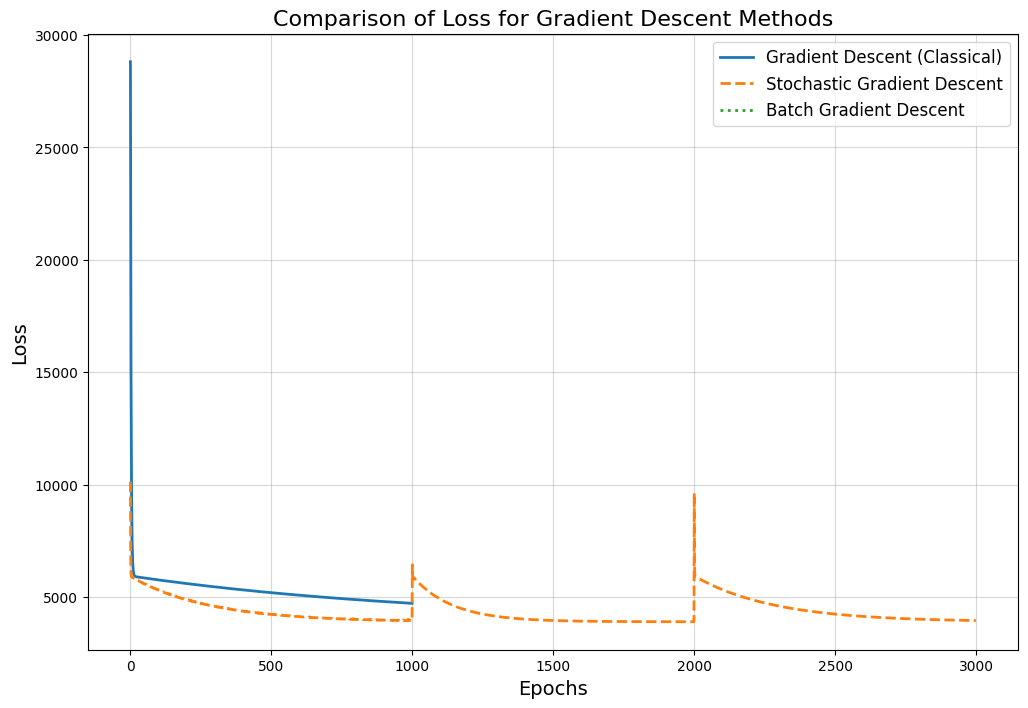

In [100]:
# Visualisation des pertes
plt.figure(figsize=(12, 8))

# Gradient Descent Classique
plt.plot(loss_history, label="Gradient Descent (Classical)", linewidth=2)

# Stochastic Gradient Descent
plt.plot(stochastic_loss_history, label="Stochastic Gradient Descent", linewidth=2, linestyle="dashed")

# Batch Gradient Descent
plt.plot(batch_loss_history, label="Batch Gradient Descent", linewidth=2, linestyle="dotted")

# Configuration du graphique
plt.title("Comparison of Loss for Gradient Descent Methods", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Affichage
plt.show()

In [101]:
# Création de la figure
fig = go.Figure()

# Gradient Descent Classique
fig.add_trace(go.Scatter(
    y=loss_history,
    mode='lines',
    name='Gradient Descent (Classical)',
    line=dict(width=2)
))

# Stochastic Gradient Descent
fig.add_trace(go.Scatter(
    y=stochastic_loss_history,
    mode='lines',
    name='Stochastic Gradient Descent',
    line=dict(width=2, dash='dash')
))

# Batch Gradient Descent
fig.add_trace(go.Scatter(
    y=batch_loss_history,
    mode='lines',
    name='Batch Gradient Descent',
    line=dict(width=2, dash='dot')
))

# Mise en forme
fig.update_layout(
    title='Comparison of Loss for Gradient Descent Methods',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    legend=dict(font=dict(size=12)),
    template='plotly_white'
)

# Affichage
fig.show()

In [102]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(epochs)][10:], y=loss_history[10:],
              mode="markers+lines",
              name="gradient descent loss"))
fig.add_trace(go.Scatter(x=[i for i in range(epochs)][10:], y=stochastic_loss_history[10:],
              mode="markers+lines",
              name="stochastic gradient descent loss"))
fig.add_trace(go.Scatter(x=[i for i in range(epochs)][10:], y=batch_loss_history[10:],
              mode="markers+lines",
              name="batch gradient descent loss"))
fig.update_layout(
    title="Gradient descent vs. Stochastic gradient descent",
    xaxis_title="epochs",
    yaxis_title="loss"
    )
fig.show()

In [103]:
# Création de la figure
fig = go.Figure()

# Gradient Descent classique
fig.add_trace(go.Scatter(
    x=list(range(10, epochs)),  # Simplifie l'extraction des indices
    y=loss_history[10:],  # Affiche les pertes après les 10 premiers epochs
    mode="markers+lines",
    name="Gradient Descent Loss",
    marker=dict(size=6),
    line=dict(width=2)
))

# Stochastic Gradient Descent
fig.add_trace(go.Scatter(
    x=list(range(10, epochs)),
    y=stochastic_loss_history[10:],
    mode="markers+lines",
    name="Stochastic Gradient Descent Loss",
    marker=dict(size=6),
    line=dict(width=2, dash="dash")
))

# Batch Gradient Descent
fig.add_trace(go.Scatter(
    x=list(range(10, epochs)),
    y=batch_loss_history[10:],
    mode="markers+lines",
    name="Batch Gradient Descent Loss",
    marker=dict(size=6),
    line=dict(width=2, dash="dot")
))

# Mise en forme et personnalisation
fig.update_layout(
    title="Gradient Descent vs Stochastic Gradient Descent vs Batch Gradient Descent",
    xaxis=dict(title="Epochs"),
    yaxis=dict(title="Loss"),
    legend=dict(
        font=dict(size=12),
        title="Methods"
    ),
    template="plotly_white"  # Amélioration de la lisibilité
)

# Affichage
fig.show()

We can conclude from the graphs that stochastic and batch gradient descent methods converge much faster than classical gradient descent for the same number of epochs